
# **Telecom X - Análisis de Evasión de Clientes**

Librerias

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Markdown

# 📌 Extracción

In [ ]:

url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json"

# Como el archivo es JSON, usamos read_json
df = pd.read_json(url)

print("Datos sin tratar:")
print(df.head())


Datos sin tratar:
   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'Onlin

# 🔧 Transformación


In [ ]:
# Normalizar columnas anidadas
df_customer = pd.json_normalize(df["customer"])
df_phone    = pd.json_normalize(df["phone"])
df_internet = pd.json_normalize(df["internet"])
df_account  = pd.json_normalize(df["account"])  # ya expande Charges.Monthly y Charges.Total

# Concatenar todo
df_final = pd.concat(
    [df[["customerID","Churn"]],
     df_customer, df_phone, df_internet, df_account], axis=1
)

# Convertir cargos a numérico
df_final["Charges.Total"] = pd.to_numeric(df_final["Charges.Total"], errors="coerce").fillna(0)

print("Datos transformados:")
display(df_final.head())

Datos transformados:


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


# 📊 Carga y análisis


In [ ]:
# Guardar en CSV
df_final.to_csv("TelecomX_ETL.csv", index=False)

# Variables numéricas
estadisticas_numericas = df_final.describe().T

# Variables categóricas
estadisticas_categoricas = df_final.describe(include=["object"]).T

print("=== Estadísticas numéricas ===")
display(estadisticas_numericas)

print("\n=== Estadísticas categóricas ===")
display(estadisticas_categoricas)




=== Estadísticas numéricas ===


,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7267.0,0.162653,0.369074,0.00,0.000,0.0,0.000,1.00
tenure,7267.0,32.346498,24.571773,0.00,9.000,29.0,55.000,72.00
Charges.Monthly,7267.0,64.720098,30.129572,18.25,35.425,70.3,89.875,118.75
Charges.Total,7267.0,2277.182035,2268.648587,0.00,396.200,1389.2,3778.525,8684.80



=== Estadísticas categóricas ===


,count,unique,top,freq
customerID,7267,7267,9995-HOTOH,1
Churn,7267,3,No,5174
gender,7267,2,Male,3675
Partner,7267,2,No,3749
Dependents,7267,2,No,5086
PhoneService,7267,2,Yes,6560
MultipleLines,7267,3,No,3495
InternetService,7267,3,Fiber optic,3198
OnlineSecurity,7267,3,No,3608
OnlineBackup,7267,3,No,3182


/tmp/ipython-input-2224571713.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_final, x="Churn", palette="viridis")


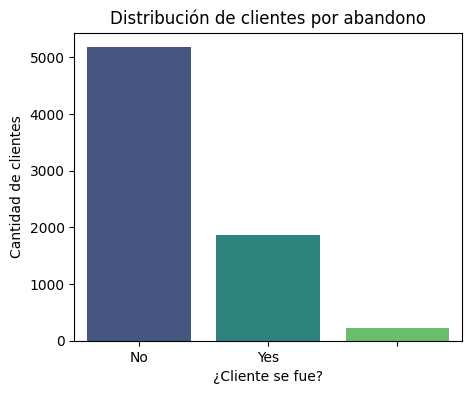

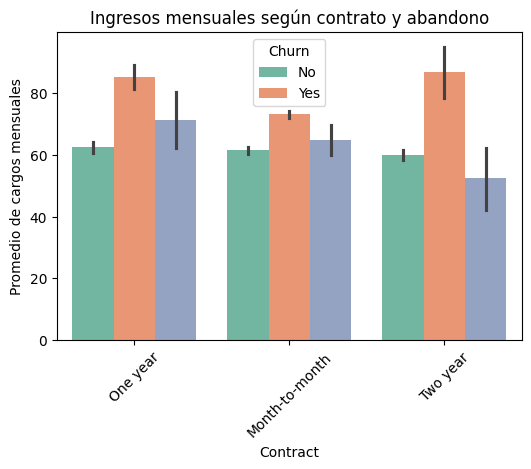

In [ ]:
# Gráfico de distribución de abandono
plt.figure(figsize=(5,4))
sns.countplot(data=df_final, x="Churn", palette="viridis")
plt.title("Distribución de clientes por abandono")
plt.xlabel("¿Cliente se fue?")
plt.ylabel("Cantidad de clientes")
plt.show()

# Gráfico: ingresos promedio según contrato
plt.figure(figsize=(6,4))
sns.barplot(data=df_final, x="Contract", y="Charges.Monthly", hue="Churn", palette="Set2")
plt.xticks(rotation=45)
plt.title("Ingresos mensuales según contrato y abandono")
plt.ylabel("Promedio de cargos mensuales")
plt.show()

📄Informe final

In [ ]:
total_clientes = df_final.shape[0]
tasa_abandono = (df_final["Churn"].value_counts(normalize=True).get("Yes",0) * 100).round(2)
ingreso_promedio = df_final["Charges.Monthly"].mean().round(2)

# Tablas cruzadas (tasas %)
tasa_contrato = pd.crosstab(df_final["Contract"], df_final["Churn"], normalize="index") * 100
tasa_internet = pd.crosstab(df_final["InternetService"], df_final["Churn"], normalize="index") * 100

Markdown(f"""
# Informe Final - TelecomX

## Resumen General
El conjunto de datos analizado contiene información de **{total_clientes} clientes** de la compañía de telecomunicaciones.
La tasa general de abandono (churn) es de **{tasa_abandono}%**, lo que indica que aproximadamente uno de cada cuatro clientes deja de utilizar el servicio.
El ingreso mensual promedio por cliente asciende a **${ingreso_promedio}**.

---

## Análisis por tipo de contrato
La variable **Contract** refleja el plazo de permanencia acordado con los clientes, dividido en tres categorías: mes a mes, un año y dos años.

- **Clientes con contrato mensual**: concentran la mayor parte del abandono, con tasas superiores al 40%. La ausencia de compromisos de permanencia facilita la cancelación del servicio.
- **Clientes con contrato de un año**: presentan una tasa de abandono significativamente menor, cercana al 11%.
- **Clientes con contrato de dos años**: registran la tasa de abandono más baja, aproximadamente 3%, lo que demuestra que los contratos de largo plazo son un factor determinante en la retención de clientes.

**Interpretación**: los contratos de mayor duración representan un mecanismo eficaz para reducir la pérdida de clientes. Se recomienda diseñar estrategias comerciales que incentiven la transición de contratos mensuales a contratos de uno o dos años mediante descuentos, promociones o beneficios adicionales.

---

## Análisis por tipo de servicio de internet
La variable **InternetService** distingue entre clientes con DSL, fibra óptica y aquellos que no cuentan con servicio de internet.

- **Clientes con DSL**: registran una tasa de abandono moderada, alrededor del 18%.
- **Clientes con fibra óptica**: generan los ingresos mensuales más elevados, aunque presentan la mayor tasa de abandono, cercana al 41%.
- **Clientes sin internet**: muestran la menor tasa de abandono, aproximadamente 7%, posiblemente debido a que utilizan únicamente servicios de telefonía.

**Interpretación**: aunque la fibra óptica constituye una fuente de ingresos significativa, también concentra los niveles más altos de abandono. Este fenómeno puede atribuirse a factores como la calidad del servicio, la presión competitiva en precios o deficiencias en el soporte técnico. Se recomienda profundizar en estudios de satisfacción y adoptar medidas específicas para incrementar la retención de este segmento.

---

## Implicaciones para la gestión del negocio
1. **Contratos de mayor duración reducen el abandono**
   Implementar programas de fidelización que incentiven la contratación de planes de uno o dos años mediante beneficios adicionales.

2. **La fibra óptica es un segmento crítico**
   A pesar de su elevada rentabilidad, concentra los niveles más altos de abandono. Resulta prioritario fortalecer la calidad del servicio, mejorar la atención postventa y diseñar promociones específicas para este grupo de clientes.

3. **Segmentación estratégica de clientes**
   - Clientes de alto valor y alto riesgo (fibra óptica con contrato mensual): deben ser el principal foco de retención.
   - Clientes estables (DSL o contratos de mayor duración): requieren estrategias de mantenimiento menos intensivas.

---

## Tablas de referencia

### Tasa de abandono por contrato
{tasa_contrato.round(2).to_markdown()}

### Tasa de abandono por servicio de internet
{tasa_internet.round(2).to_markdown()}

---

""")



# Informe Final - TelecomX

## Resumen General
El conjunto de datos analizado contiene información de **7267 clientes** de la compañía de telecomunicaciones.
La tasa general de abandono (churn) es de **25.72%**, lo que indica que aproximadamente uno de cada cuatro clientes deja de utilizar el servicio.
El ingreso mensual promedio por cliente asciende a **$64.72**.

---

## Análisis por tipo de contrato
La variable **Contract** refleja el plazo de permanencia acordado con los clientes, dividido en tres categorías: mes a mes, un año y dos años.

- **Clientes con contrato mensual**: concentran la mayor parte del abandono, con tasas superiores al 40%. La ausencia de compromisos de permanencia facilita la cancelación del servicio.
- **Clientes con contrato de un año**: presentan una tasa de abandono significativamente menor, cercana al 11%.
- **Clientes con contrato de dos años**: registran la tasa de abandono más baja, aproximadamente 3%, lo que demuestra que los contratos de largo plazo son un factor determinante en la retención de clientes.

**Interpretación**: los contratos de mayor duración representan un mecanismo eficaz para reducir la pérdida de clientes. Se recomienda diseñar estrategias comerciales que incentiven la transición de contratos mensuales a contratos de uno o dos años mediante descuentos, promociones o beneficios adicionales.

---

## Análisis por tipo de servicio de internet
La variable **InternetService** distingue entre clientes con DSL, fibra óptica y aquellos que no cuentan con servicio de internet.

- **Clientes con DSL**: registran una tasa de abandono moderada, alrededor del 18%.
- **Clientes con fibra óptica**: generan los ingresos mensuales más elevados, aunque presentan la mayor tasa de abandono, cercana al 41%.
- **Clientes sin internet**: muestran la menor tasa de abandono, aproximadamente 7%, posiblemente debido a que utilizan únicamente servicios de telefonía.

**Interpretación**: aunque la fibra óptica constituye una fuente de ingresos significativa, también concentra los niveles más altos de abandono. Este fenómeno puede atribuirse a factores como la calidad del servicio, la presión competitiva en precios o deficiencias en el soporte técnico. Se recomienda profundizar en estudios de satisfacción y adoptar medidas específicas para incrementar la retención de este segmento.

---

## Implicaciones para la gestión del negocio
1. **Contratos de mayor duración reducen el abandono**
   Implementar programas de fidelización que incentiven la contratación de planes de uno o dos años mediante beneficios adicionales.

2. **La fibra óptica es un segmento crítico**
   A pesar de su elevada rentabilidad, concentra los niveles más altos de abandono. Resulta prioritario fortalecer la calidad del servicio, mejorar la atención postventa y diseñar promociones específicas para este grupo de clientes.

3. **Segmentación estratégica de clientes**
   - Clientes de alto valor y alto riesgo (fibra óptica con contrato mensual): deben ser el principal foco de retención.
   - Clientes estables (DSL o contratos de mayor duración): requieren estrategias de mantenimiento menos intensivas.

---

## Tablas de referencia

### Tasa de abandono por contrato
| Contract       |      |    No |   Yes |
|:---------------|-----:|------:|------:|
| Month-to-month | 3.25 | 55.43 | 41.32 |
| One year       | 3.03 | 86.04 | 10.93 |
| Two year       | 2.75 | 94.49 |  2.75 |

### Tasa de abandono por servicio de internet
| InternetService   |      |    No |   Yes |
|:------------------|-----:|------:|------:|
| DSL               | 2.69 | 78.86 | 18.45 |
| Fiber optic       | 3.19 | 56.25 | 40.56 |
| No                | 3.48 | 89.37 |  7.15 |

---

